# Funções de Probabilidade - Desafio 3

O objetivo dessa semana foi aprender mais sobre amostragram, funções de probabilidade, distribuição normal e binomial, entre outros elementos que introduzem ao campo da Estatística.
Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para tal, o desafio é dividido em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

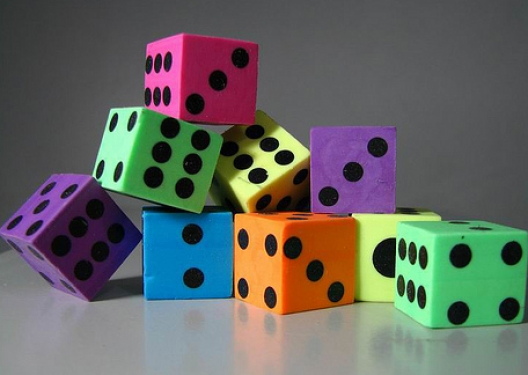

## _Setup_ geral

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

## Parte 1

### _Setup_ da parte 1

In [60]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

#### Analisando o dataframe
O ```dataframe``` dispõe de uma coluna de nome ```normal``` que possui valores normais em que a média é 20, o desvio padrão é 4 (e, portanto, a variância é 16). Enquanto isso, a coluna ```binomial``` consiste numa coluna de valores binomais com a mesma média, desvio padrão e variância. Vamos conferir à baixo:

In [61]:
print('Normal -','Media:', dataframe.normal.mean(),
      'Desvio Padrão: ', dataframe.normal.std(),
      'Variância:', dataframe.normal.var())
print('Binomial -','Media:', dataframe.binomial.mean(),
      'Desvio Padrão: ', dataframe.binomial.std(),
      'Variância:', dataframe.binomial.var())

Normal - Media: 19.991456066526293 Desvio Padrão:  4.013849522013614 Variância: 16.110987985368915
Binomial - Media: 20.097 Desvio Padrão:  4.0411909287253724 Variância: 16.331224122412237


In [62]:
# Outra formas de encontrar esses dados é pelo método describe (com exceção da variância)
dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


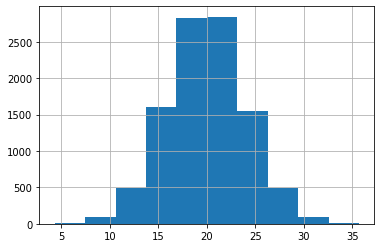

In [63]:
# Histograma da Coluna Normal
dataframe.normal.hist()

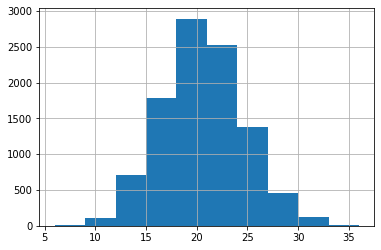

In [64]:
# Histograma da Coluna Binomial
dataframe.binomial.hist()

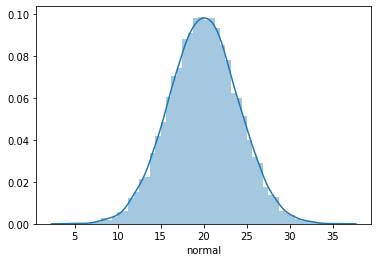

In [65]:
sns.distplot(dataframe.normal);

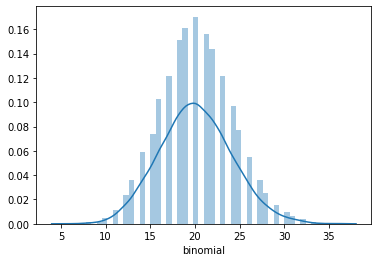

In [66]:
sns.distplot(dataframe.binomial);

In [67]:
dataframe.dtypes

normal      float64
binomial      int32
dtype: object

In [69]:
# questão 1 
q1_norm, q2_norm, q3_norm = dataframe.normal.quantile([0.25, 0.5, 0.75])
q1_binom, q2_binom, q3_binom = dataframe.binomial.quantile([0.25, 0.5, 0.75])
(round(float(q1_norm - q1_binom),3), round(float(q2_norm - q2_binom),3), round(float(q3_norm - q3_binom),3))

In [96]:
# questão 2
x = dataframe['normal'].mean()
s = dataframe['normal'].std()
e_cdf = ECDF(dataframe['normal'])
intervalo_min = x - s
intervalo_max = x + s
result = e_cdf(intervalo_max) - e_cdf(intervalo_min)
np.asscalar(result.round(3))

0.684

LINK ÚTIL:
[How to Use an Empirical Distribution Function in Python](https://machinelearningmastery.com/empirical-distribution-function-in-python/)

In [ ]:
# questão 3
m_binom, v_binom = dataframe.binomial.mean(), dataframe.binomial.var()
m_norm, v_norm = dataframe.normal.mean(), dataframe.normal.var()
round((m_binom - m_norm),3), round((v_binom - v_norm),3)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [74]:
def q1():
    q1_norm, q2_norm, q3_norm = dataframe.normal.quantile([0.25, 0.5, 0.75])
    q1_binom, q2_binom, q3_binom = dataframe.binomial.quantile([0.25, 0.5, 0.75])
    result = (round(float(q1_norm - q1_binom),3), round(float(q2_norm - q2_binom),3), round(float(q3_norm - q3_binom),3))
    return result

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

Era esparado que a diferença entre os quantis fosse pequena. Isso significa que a distribuição de seus valores é consideravelamente próxima. Por mais que as distribuições seja de diferentes tipos (discreta e contínua), elas podem ser tratadas de modo similar porque, além de ambas terem valores grandes (n = 10000), seus parâmetros são praticamente iguais (média e desvio padrão), permitindo com que uma distribuição binomial possa se assemelhar à disitrbuição normal. 

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [93]:
def q2():
    x = dataframe['normal'].mean()
    s = dataframe['normal'].std()
    e_cdf = ECDF(dataframe['normal'])
    intervalo_min = x - s
    intervalo_max = x + s
    result = e_cdf(intervalo_max) - e_cdf(intervalo_min)
    return np.asscalar(result.round(3))

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

Esse valores eram teoricamente esperado tendo em vista que a função de distribuição acumulada empírica, quando aplicada a uma distribuição normal, possui algumas propriedades já conhecidas como:
* A probabilidade de uma variável aleatória assumir valores entre 𝜇−𝜎 e 𝜇+𝜎 é de 68.27%.
* A probabilidade de uma variável aleatória assumir valores entre 𝜇−2𝜎 e 𝜇+2𝜎 é de 95.45%.
* A probabilidade de uma variável aleatória assumir valores entre 𝜇−3𝜎 e 𝜇+3𝜎 é de 99.73%.

In [100]:
intervalo_min2 = x - (s*2)
intervalo_max2 = x + (s*2)
result = e_cdf(intervalo_max2) - e_cdf(intervalo_min2)
print('A probabilidade de uma variável aleatória assumir valores entre 𝜇−2𝜎 e 𝜇+2𝜎: ', np.asscalar(result.round(3)))
intervalo_min3 = x - (s*3)
intervalo_max3 = x + (s*3)
result = e_cdf(intervalo_max3) - e_cdf(intervalo_min3)
print('A probabilidade de uma variável aleatória assumir valores entre 𝜇−2𝜎 e 𝜇+2𝜎: ',np.asscalar(result.round(3)))

A probabilidade de uma variável aleatória assumir valores entre 𝜇−2𝜎 e 𝜇+2𝜎:  0.954
A probabilidade de uma variável aleatória assumir valores entre 𝜇−2𝜎 e 𝜇+2𝜎:  0.997


## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [ ]:
def q3():
    m_binom, v_binom = dataframe.binomial.mean().item(), float(dataframe.binomial.var())
    m_norm, v_norm = float(dataframe.normal.mean()), float(dataframe.normal.var())
    result = (float(round((m_binom - m_norm),3)), float(round((v_binom - v_norm),3)))
    return result

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

Sim, esses valores eram esparados tendo em vista que uma variável binomial pode ser aproximada a uma variável normal se se trata de valores grandes de 𝑛. Isto é, sendo 𝑛≥20 e 𝑝 não esteja preferencialemente nem muito próximo de 0 nem de 1, pode-se fazer esse tratamento similar. Portanto,o aumento ou a diminuição de n não altera siginificativamente esse quadro.

## Parte 2

### _Setup_ da parte 2

In [ ]:
stars = pd.read_csv("3.pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [79]:
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [80]:
stars.shape

(17897, 9)

In [81]:
stars.dtypes

mean_profile    float64
sd_profile      float64
kurt_profile    float64
skew_profile    float64
mean_curve      float64
sd_curve        float64
kurt_curve      float64
skew_curve      float64
target             bool
dtype: object

In [82]:
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [ ]:
# Desobrindo a proporção de observações que são classificadas como Pulsar
stars['target'].value_counts()/stars.shape[0]
# Apenas 9% das observações são classificadas como Pulsar

In [ ]:
# questão 4
mp = stars[stars['target']==False]['mean_profile']
false_pulsar_mean_profile_standardized = (mp-mp.mean())/mp.std()
ppf = sct.norm.ppf([0.8,0.9, 0.95], loc=0, scale=1) 
ecdf = ECDF(false_pulsar_mean_profile_standardized)
(round(ecdf(ppf[0]),3),round(ecdf(ppf[1]),3), round(ecdf(ppf[2]),3))

In [83]:
false_pulsar_mean_profile_standardized.describe().apply(lambda x: '%.8f' % x)

count    16258.00000000
mean         0.00000000
std          1.00000000
min         -5.68513413
25%         -0.64715318
50%          0.03985947
75%          0.67065487
max          4.35215747
Name: mean_profile, dtype: object

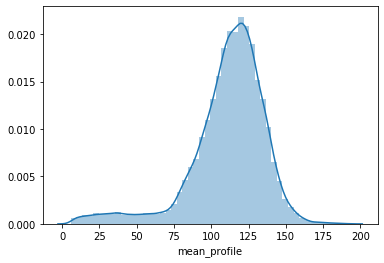

In [84]:
# distribuição assimétrica
sns.distplot(stars.mean_profile)

Qual a diferença entre os quantis Q1, Q2 e Q3 de false_pulsar_mean_profile_standardized e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [ ]:
quant1, quant2, quant3 = [false_pulsar_mean_profile_standardized.quantile(i) for i in [0.25,0.5, 0.75]]
q1_teorico, q2_teorico, q3_teorico = [sct.norm.ppf(i, loc=0, scale=1) for i in [0.25,0.5, 0.75]]
(round(quant1-q1_teorico,3), round(quant2-q2_teorico,3), round(quant3-q3_teorico,3))

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [ ]:
def q4():
    mp = stars[stars['target']==False]['mean_profile']
    false_pulsar_mean_profile_standardized = (mp-mp.mean())/mp.std()
    ppf = sct.norm.ppf([0.8,0.9, 0.95], loc=0, scale=1) 
    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    return (round(ecdf(ppf[0]),3),round(ecdf(ppf[1]),3), round(ecdf(ppf[2]),3))

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

O procedimento realizado pode ser explicado assim: utilizou-se a função norm.ppf() para descobrir os quantis teóricos para uma distribuição normal de média 0 e variância 1. Como nossa distribuição não é normal, temos que usar a CDF empírica para descobrir as reais probabilidades desses quantis em relação à nossa disitrbuição. Esse procedimento consegue ser garantido graças à padronização anteriormente feita, que faz com que a média e a variância sejam respectivamente 0 e 1, garantindo a compatibilidade na hora de averiguar as reais probabilidades dos quantis teóricos. 

Os valores encontrados fazem sentido quando comparados com a distribuição dos valores da variável `false_pulsar_mean_profile_standardized`, visualizados com o auxílio do método describe(): por exemplo, 75% dos dados estão abaixo de 0.67065487, o que permite intuit que , conforme a ECDF, para o quantil 0.84162123, a probabilidade de 0.806 faz sentido.

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [ ]:
def q5():
    q1, q2, q3 = [false_pulsar_mean_profile_standardized.quantile(i) for i in [0.25,0.5, 0.75]]
    q1_teorico, q2_teorico, q3_teorico = [sct.norm.ppf(i, loc=0, scale=1) for i in [0.25,0.5, 0.75]]
    return (round(q1-q1_teorico,3), round(q2-q2_teorico,3), round(q3-q3_teorico,3))

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.